In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from datetime import datetime
import seaborn as sns



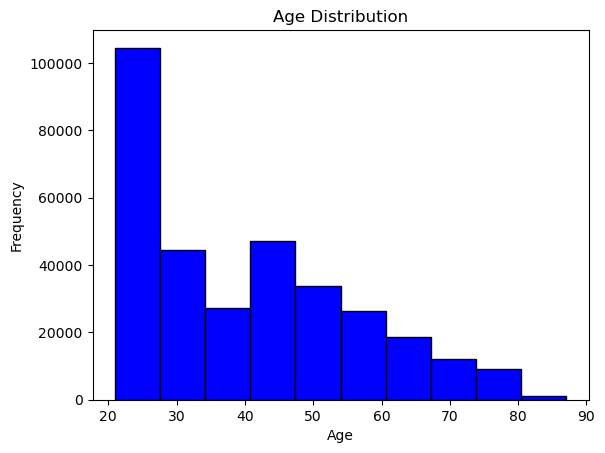

,Agent_name,Annual_Premium
124,Obiero Ochieng,3540111121
22,Jomo Kenyatta,2284661069
105,Njoroge Karanja,1997845221
18,Gitonga Mwangi,475238042
41,Kimani Mwenda,312278181
6,Chege Nyaga,144430207
130,Onyango Mariga,103846148
38,Kibet Makori,97722877
115,Nyaga Kibet,79467053
27,Karanja Wanjala,60298000


In [5]:



df = pd.read_csv(r'train_data_cross-sell.csv', encoding='latin1')


currentdate = datetime.now().year

df['Age'] = currentdate - pd.to_datetime(df['Customer_Date_of_Birth']).dt.year

plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()



top_10_agents =df.groupby('Agent_name')['Annual_Premium'].sum().reset_index()


top_10_agents.columns

top_10_agents = top_10_agents.sort_values(by='Annual_Premium', ascending=False)

top_10_agents = top_10_agents.head(10)
top_10_agents




In [6]:


plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

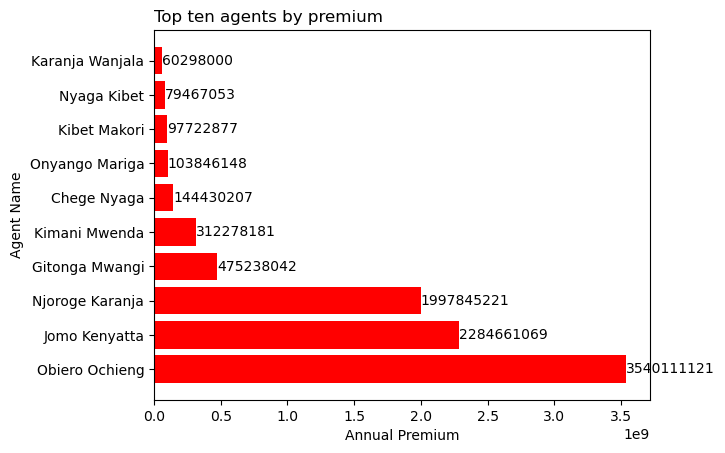

In [10]:
#plot horizontal bar

plt.barh(top_10_agents['Agent_name'],top_10_agents['Annual_Premium'], color ='red')

plt.title('Top ten agents by premium', loc="left")
plt.xlabel('Annual Premium')    
plt.ylabel('Agent Name')

# write a for loop to go through the top ten agents in the column

for index, value in enumerate(top_10_agents['Annual_Premium']):
    plt.text(value + 200, index, str(value), va = 'center')

plt.show()

In [ ]:
df["Customer_Date_of_Birth"] = pd.to_datetime(df["Customer_Date_of_Birth"])

#Calculate Age

current_year = datetime.now().year
df["Age"] = current_year - df["Customer_Date_of_Birth"].dt.year


#plot the histograms of ages

sns.histplot(df["Age"], bins=30, color="#80500A", alpha=0.8, kde = False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.title("Histogram of Ages")
plt.tight_layout()
plt.show()



In [8]:
cd = datetime.now()

print(cd)


2025-03-02 21:24:43.417455


In [11]:
x = [2,3,4]
y= [5,6,7]

xarray = np.array(x)
yarray = np.array(y)

correlation = np.corrcoef(xarray,yarray)

print(correlation)

[[1. 1.]
 [1. 1.]]


In [12]:
df = pd.read_csv('titanic.csv', index_col=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# population mean
population_mean = df.Age.mean()
population_mean

29.69911764705882

In [16]:
# sample mean
sample = df.sample(n=50, random_state=22)
sample_mean = sample.Age.mean()
print(f"Sample mean: {sample_mean}")


Sample mean: 27.79268292682927


In [18]:
# Find the difference between the sample and population means

err = np.abs(sample_mean - population_mean)

err

# Divide by the population mean to find a percent error
per_err = err / population_mean

per_err


0.06419162827951391

In [ ]:
# calculate fime sample means

five_sample_means = []
for i in range(5):
    sample = df.sample(n=50, random_state=i+100)
    five_sample_means.append(sample.Age.mean())

five_sample_means


[27.504146341463418,
 28.30263157894737,
 26.83783783783784,
 31.75,
 28.573170731707318]

In [22]:
# calculate errors for five sample means 

five_sample_errors = [np.abs(sample_mean-population_mean)/population_mean for sample_mean in five_sample_means]
five_sample_errors

[0.07390695345498845,
 0.047021129876892075,
 0.09634224973361595,
 0.06905532943145481,
 0.037911796866564734]

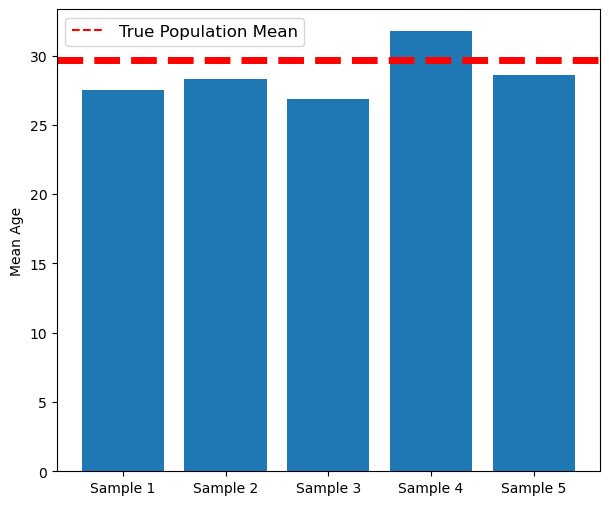

In [26]:
x_labels = [f"Sample {x}" for x in range(1, 6)]

fig, ax = plt.subplots(figsize=(7,6))

ax.bar(x_labels, five_sample_means)
ax.set_ylabel("Mean Age")
ax.axhline(y=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D([0],[0], color="red", linestyle="--")],
    labels=["True Population Mean"],
    fontsize="large"
)

In [27]:
# sample mean for 1000 samples

sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i)
    sample_means.append(sample.Age.mean())

len(sample_means)    

10000

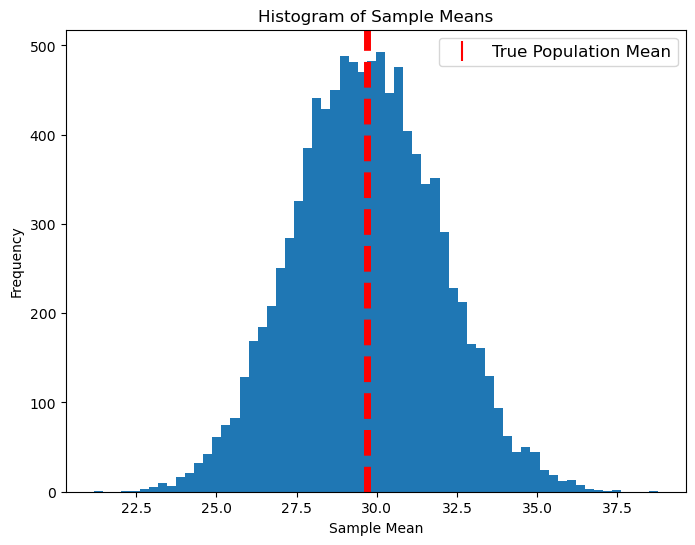

In [31]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(sample_means, bins="auto")
ax.set_xlabel("Sample Mean")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Sample Means")
ax.axvline(x=population_mean, color="red", linewidth=5, linestyle="--")
ax.legend(
    handles=[Line2D(
        [0],[0],
        color="white",
        marker="|",
        markersize=15,
        markeredgewidth=1.5,
        markeredgecolor="red"
    )],
    labels=["True Population Mean"],
    fontsize="large"
)




In [33]:
ten_thousand_samples_mean = np.mean(sample_means)
ten_thousand_samples_mean

population_mean

29.69911764705882

In [34]:
err = np.abs(ten_thousand_samples_mean - population_mean) / population_mean
accuracy = 1 - err
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 99.93%
